# Problem Set 6 - Campbell Clarkson
This problem set will involve utilizing machine learning to predict President Biden's feeling thermometer, a scale ranging from 0 to 100, where higher numbers indicate warmer feeling. I will be using regression trees to complete this example.

In [1]:
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_text
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# reading in the data

data = pd.read_csv('biden.csv')
data.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


In [8]:
# Clean and split the data 70/30 (train and test)
y = data['biden'].values
X_var_names = ['female', 'age', 'educ', 'dem', 'rep']
X = data[X_var_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [9]:
# fitting the tree

dtree = tree.DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 5)
biden_tree = dtree.fit(X_train, y_train)

The SSE of a tree of depth 3 and  8  leaves =  392.74783098662505


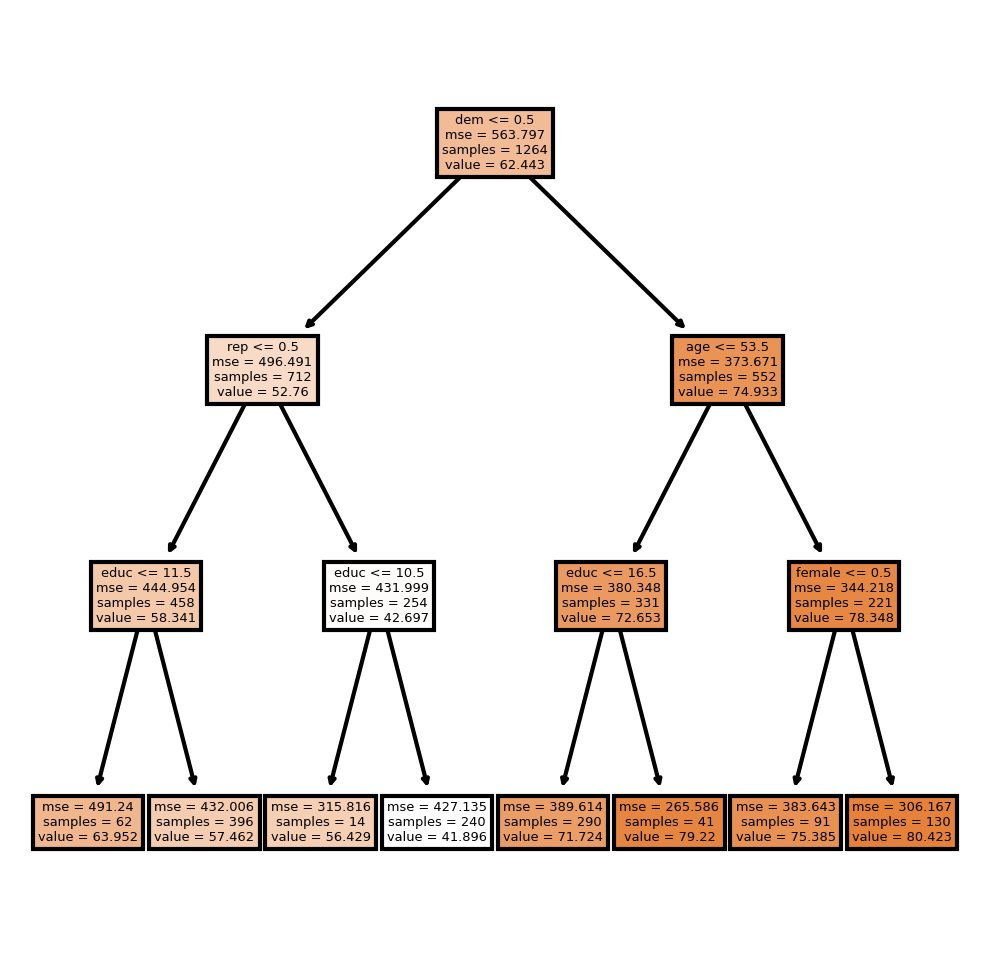

In [10]:
# plotting the tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(biden_tree,
           feature_names = X_var_names, 
           filled = True);

# Fit of the tree
MSE = mean_squared_error(y, biden_tree.predict(X))
print('The SSE of a tree of depth 3 and ',
      biden_tree.get_n_leaves(), ' leaves = ', MSE)

When we examine the above tree, we can make several interpretations about which people are warmer towards President biden.

First, the decision tree splits on democrat (yes or no), where we find that the predicted warmth among democrats is 74, so quite warm, whereas non-democrats have a warmth rating of around 52. Next, the tree splits the democrats on age (52.5) and the non-democrats on republican status. All in all, looking down to the results of the tree, we can see the predominantly warm group (with a warmth rating of 79.714) consists of older, democratic females. This is followed by younger, highly educated democrats.

The coldest group towards President Biden consists of Republicans with more than 10.5 years of education. This group carries a temp. rating of 41.528 towards the president.

The Mean Squared Error in this example is 392.57.

# 2. Randomized Searching on Hyper Parameters
In this problem, we will use the RandomizedSearchCV function from sklearn.

In [12]:
# create distributions for parameters

from scipy.stats import randint as sp_randint
param_dist = {'max_depth': [3, 10],
              'min_samples_split': sp_randint(2, 20),
              'min_samples_leaf': sp_randint(2, 20)}

In [13]:
rand = RandomizedSearchCV(biden_tree, param_dist, n_iter = 100, n_jobs = - 1, cv = 5, 
                          scoring = 'neg_mean_squared_error', random_state = 25)
rand.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=3,
                                                   min_samples_leaf=5),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [3, 10],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000175C2037B80>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000175C2037310>},
                   random_state=25, scoring='neg_mean_squared_error')

In [16]:
rand.fit(X, y).best_params_()
rand.fit(X, y).best_score_()

TypeError: 'dict' object is not callable

*For the time being, I am working on trying to allow the parameter measures and the scoring meaasures to be callable. Please disregard below until I have resolved this issue*

The optimally tuned parameter values for this random forest model (see rand_forest_mod in the code blocks above) are:` `

The MSE (in other words, accuracy) of this model is:` `

# 3. Random Forest with tuned parameters
Now we will use RandomForestRegressor to implement a random forest regression model and look at the accuracy of the results.

In [15]:
import sklearn.model_selection

rand_forest_mod = sklearn.ensemble.RandomForestRegressor()

param_dist = {'n_estimators': [10 , 200],
            'max_depth': [3, 10],
            'min_samples_split': sp_randint (2, 20),
            'min_samples_leaf': sp_randint (2, 20),
            'max_features': sp_randint (1, 5)}

temp = sklearn.model_selection.RandomizedSearchCV(rand_forest_mod, param_dist, n_iter = 100, n_jobs = - 1, 
        cv = 5, scoring = 'neg_mean_squared_error', random_state = 25)

temp.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 10],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000175C12A1D60>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000175BB4CEDC0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000175C12A1520>,
                                        'n_estimators': [10, 200]},
                   random_state=25, scoring='neg_mean_squared_error')

In [17]:
temp.fit(X, y).best_params_()
temp.fit(X, y).best_score_()

TypeError: 'dict' object is not callable

*For the time being, I am working on trying to allow the parameter measures and the scoring meaasures to be callable. Please disregard below until I have resolved this issue*

The optimally tuned parameter values for this random forest model (see rand_forest_mod in the code blocks above) are:

The MSE (in other words, accuracy) of this model is: